<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Пропущенные-значения-и-дубликаты" data-toc-modified-id="Пропущенные-значения-и-дубликаты-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Пропущенные значения и дубликаты</a></span></li><li><span><a href="#Названия-столбцов" data-toc-modified-id="Названия-столбцов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Названия столбцов</a></span></li><li><span><a href="#Распределение-данных" data-toc-modified-id="Распределение-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Распределение данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

# Описание данных

Набор данных находится в файле `/datasets/insurance.csv`.  

**Признаки**: пол, возраст и зарплата застрахованного, количество членов его семьи.  
**Целевой признак**: количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

Импортируем неоюходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
try:
    df = pd.read_csv('insurance.csv')
    
except:
    df = pd.read_csv('/datasets/insurance.csv')

Посмотрим на наш датафрейм и выведем информацию по нему

In [3]:
df.sample(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
3066,0,21.0,45800.0,3,0
3351,1,30.0,41300.0,1,0
4545,0,31.0,47700.0,1,0
1052,0,29.0,40100.0,0,0
3688,1,39.0,37800.0,1,0
3587,1,22.0,29900.0,2,0
726,1,20.0,5300.0,1,0
3748,1,26.0,42200.0,1,0
2644,1,33.0,40000.0,1,0
2607,0,51.0,21800.0,0,2


In [4]:
print('Размер датафрейма равен {}'.format(df.shape))

Размер датафрейма равен (5000, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Пол,5000.0,0.4990,0.500049,0.0,0.0,0.0,1.0,1.0
Возраст,5000.0,30.9528,8.440807,18.0,24.0,30.0,37.0,65.0
Зарплата,5000.0,39916.3600,9900.083569,5300.0,33300.0,40200.0,46600.0,79000.0
Члены семьи,5000.0,1.1942,1.091387,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,5000.0,0.1480,0.463183,0.0,0.0,0.0,0.0,5.0


### Пропущенные значения и дубликаты

Посмотрим на пропущенные значения

In [7]:
df.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [8]:
print('Количество дубликатов в датафрейме равно {}'.format(df.duplicated().sum()))

Количество дубликатов в датафрейме равно 153


Избавимся от дубликатов

In [9]:
df = df.drop_duplicates()

In [10]:
print('Количество дубликатов в датафрейме равно {}'.format(df.duplicated().sum()))

Количество дубликатов в датафрейме равно 0


In [11]:
print('Размер датафрейма равен {}'.format(df.shape))

Размер датафрейма равен (4847, 5)


### Названия столбцов

Приведем названия столбцов к snake_case на английском языке

In [12]:
df.columns = [
    'gender',
    'age',
    'salary',
    'family_members',
    'insurance_payments'
]

### Распределение данных

Посмотрим на расперделение в данных. Для этого напишем функцию **plot_hist**

In [13]:
def plot_hist(df):

    for col in df.columns:

        fig, ax = plt.subplots(1, 2, figsize=(12, 5))

        sns.histplot(data=df, x=col, ax=ax[0])
        sns.boxplot(data=df[col], orient='h', ax=ax[1])
        
        ax[0].set_title(f'Распределение в столбце {col}')
        ax[1].set_title(f'Ящик с усами столбца {col}')
        ax[0].set_ylabel('Количество')

        plt.show

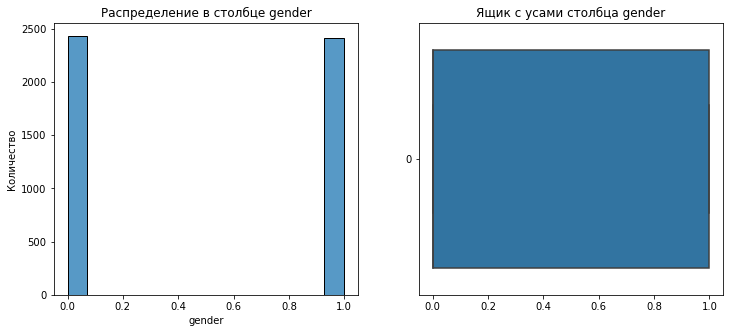

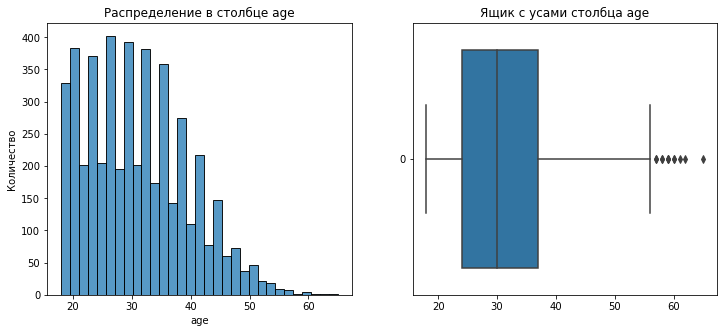

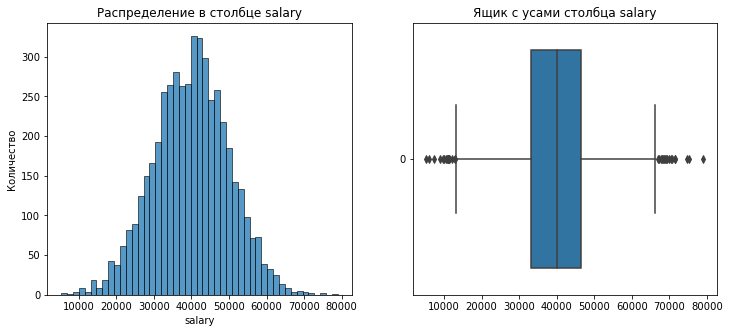

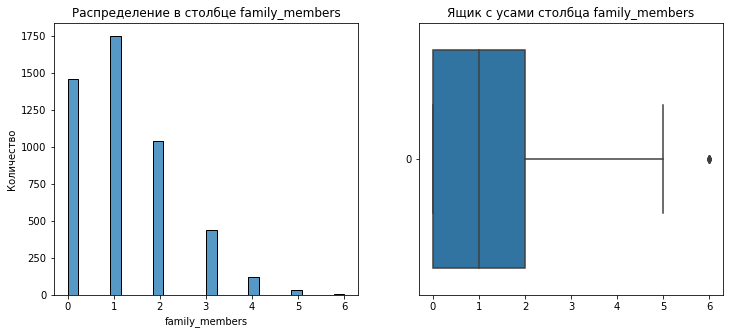

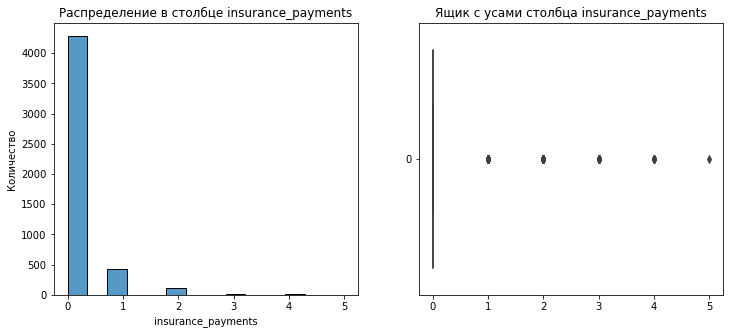

In [14]:
plot_hist(df)

### Вывод

На данном этапе мы загрузили наши данные, исходный размер датафрейм составлял (5000, 5).  
Далее мы посмотрели на данные и убедились, что в данных нет пропущенных значений, но есть дубликаты.
Мы избавились от дубликатов и получили размер датафрейма равный (4847, 5).  
После этого, мы привели названия столбцов к snake_case на английском языке и посмотрели на распределение данных, есть небольшое количество выбросов, но для дальнейшего анализа они сильно не повлияют, поэтому их трогать мы не будем.  
Можно приступать к следующему этапу.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)  
Иными словами, если матрицу $X$ умножим на обратимую матрицу $P$, то при вычислении весов линейной регрессии $w$  предсказания  $a = Xw$ не изменятся.  
Матрица $P^{-1}$ называется обратной матрицей по отношению к матрице $P$, если $P\times P^{-1}$ = $Е$, где $Е$ — единичная матрица **n**-го порядка. Обратная матрица может существовать только для квадратных матриц.

**Ответ:**  
При умножении матрицы признаков $X$ на обратимую матрицу $P$ получим те же предсказания модели, что и при изначальной матрице $X$

**Обоснование:**  

1)Подставим в нашу формулу обучения $w = (X^T X)^{-1} X^T y$ вместо матрицы $X$ произведение матрицы $X$ на обратимую матрицу $P$:

$$w_{new} = ((XP)^T XP)^{-1} (XP)^T y $$  

2) Транспонированное произведение матриц равно произведению транспонированных матриц, взятых в обратном порядке. Поэтому раскроем скобки $(XP)^T = P^T X^T$ и получим формулу:

$$ w_{new} = (P^T X^T XP)^{-1} P^T X^T y  $$

3) Вынесем $P^T$ и $P$ за скобку:

$$ w_{new} = (P^T)^{-1} P^{-1} (X^T X)^{-1} P^T X^T y  $$

4) Получаем что $P^T \times (P^T)^{-1} = E$, запишем получившеюся формулу:

$$ w_{new} =  P^{-1} (X^T X)^{-1} E X^T y =  P^{-1} (X^T X)^{-1} X^T y$$

5) Можно заметить, что часть формулы похожа на формулу для обучения $w = (X^T X)^{-1} X^T y$, поэтому проведем замену:

$$ w_{new} = P^{-1} w $$

6) Теперь подставим $w_{new}$ и матрицу $XP$ в формулу предскзаний $a = Xw$:

$$ a_{new} = XPP^{-1} w $$

7) Матрица $P^{-1}$ является обратной матрицей по отношению к матрице $P$ и получаем что они равный еденичной матрице $P\times P^{-1}$ = $Е$:

$$ a_{new} = XEw $$

$$ a_{new} = Xw $$

$$ a_{new} = a $$

## Алгоритм преобразования

Количество признаков в наших данных равно 4, поэтому создадим обратимую матрицу размером 4 на 4. Для этого воспользуемся функцией из библиотеки **numpy**.

In [15]:
P = np.random.randint(100, size=(4,4))
print('Обратимая матрица P:')
display(P)

Обратимая матрица P:


array([[63, 21, 89, 54],
       [ 7, 62, 31, 50],
       [74, 15, 52, 13],
       [ 5, 14, 20, 96]])

Проверим получившеюся матрицу на обратимость. Матрица $P^{-1}$ называется обратной матрицей по отношению к матрице $P$, если $P\times P^{-1}$ = $Е$, где $Е$ — единичная матрица **n**-го порядка, у которой по главной диагонали располагаются еденицы, а все остальные нули

In [16]:
np.round(np.dot(P, np.linalg.inv(P)))

array([[ 1.,  0., -0.,  0.],
       [ 0.,  1., -0., -0.],
       [ 0.,  0.,  1., -0.],
       [-0.,  0.,  0.,  1.]])

Теперь выделим признаки и целевую переменную из нашего датафрейма. Целевой переменной будет столбец `insurance_payments`, а признаками остальные столбцы

In [17]:
X = df.drop('insurance_payments', axis=1)
y = df['insurance_payments']

Проведем масштабирование признаков

In [18]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

Рассчитаем вектор весов для изначально матрицы по формуле $w = (X^T X)^{-1} X^T y$

In [19]:
w = np.linalg.inv(np.dot(X_scaled.T, X_scaled)).dot(X_scaled.T).dot(y)

Расчитаем вектор предсказаний по формуле $a = Xw$

In [20]:
a = np.dot(X_scaled, w)

Проведем те же манипуляции, но умножим исходную матрицу признаков $X$ на обратимую матрицу $P$

In [21]:
XP = np.dot(X_scaled, P)

w_new = np.linalg.inv(np.dot(XP.T, XP)).dot(XP.T).dot(y)

a_new = np.dot(XP, w)

Посмотрим, есть ли разница в между вектором предсказаний изначальной матрицы признаков и матрицы признаков умноженную на обратимую матрицу

In [22]:
print('Разница между векторами равна {}'.format(np.round((a - a_new).sum())))

Разница между векторами равна 0.0


### Вывод

Мы провели анализ, в котором проверили влияет ли качество предсказания при умножении матрицы признаков $X$ на обратимую матрицу $P$ и получили те же предсказания модели, что и при изначальной матрице $X$.  

## Проверка алгоритма

Напишем функцию для обучения модели Линейной регрессии и сравним метрики R2 при обучении модели на исходной матрице признаков и матрицы признаков умноженную на обратимую матрицу

In [23]:
def lr_predict(X,y):
    model = LinearRegression()
    model.fit(X,y)
    predictions = model.predict(X)
    
    return r2_score(y, predictions)

In [24]:
X_r2 = lr_predict(X_scaled, y)

In [25]:
print('Метрика R2 модели обученной на исходной матрице признаков равна {:.4f}'.format(X_r2))

Метрика R2 модели обученной на исходной матрице признаков равна 0.4302


In [26]:
XP_rs = lr_predict(XP, y)

In [27]:
print(
    'Метрика R2 модели обученной на исходной матрице умноженной на обратимую матрицу равна {:.4f}'
    .format(XP_rs))

Метрика R2 модели обученной на исходной матрице умноженной на обратимую матрицу равна 0.4302


In [28]:
if X_r2 == XP_rs:
    print('Векторы предсказаний равны')
else:
    print('Векторы предсказаний не равны')

Векторы предсказаний равны


### Вывод

На данном этапе мы провели обучение модели Линейной регресии на исходной матрице признаков и матрицы признаков умноженную на обратимую матрицу. В итоге получили, что значение метрики R2 в обоих вариантах равна, следовательно умножение исходной матрицы на обратимую матрицу никак не влияет на качество предсказание модели.

## Общий вывод

При начале работы с данными мы загрузили их и получили исходный размер датафрейма (5000, 5).
Далее мы посмотрели на данные и убедились, что в данных нет пропущенных значений, но есть дубликаты. Мы избавились от дубликатов и получили размер датафрейма равный (4847, 5).
После этого, мы привели названия столбцов к snake_case на английском языке и посмотрели на распределение данных, есть небольшое количество выбросов, но для дальнейшего анализа они сильно не повлияют, поэтому их трогать мы не трогали.  
На следующем этапе мы привели обоснование, что при умножении матрицы признаков $X$ на обратимую матрицу $P$ получим те же предсказания модели, что и при изначальной матрице $X$.  
Далее мы провели обучение модели Линейной регресии на исходной матрице признаков и матрицы признаков умноженную на обратимую матрицу. В итоге получили, что значение метрики R2 в обоих вариантах равна, следовательно умножение исходной матрицы на обратимую матрицу никак не влияет на качество предсказание модели.